1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
x, y, coef_w = make_regression(
    n_samples=1000,
    n_features=2,
    n_targets=1,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=5,
    shuffle=True,
    coef=True,
    random_state=33)

In [3]:
coef_w

array([36.31774515, 56.81396191])

In [4]:
x

array([[ 0.74473695, -0.76399399],
       [ 2.77553547,  0.31273507],
       [ 0.51612457, -1.28077842],
       ...,
       [-2.21084522,  1.58418413],
       [ 1.34504259, -0.55339663],
       [-0.44064812, -1.36952065]])

In [5]:
len(x)

1000

In [37]:
x.shape[0]

1000

In [6]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)

В первом ДЗ мы все выполнили для разовой задачи. Такой подход больше не приемлем, нужно писать универсальные функции для каждого метода

Какие функции нужно написать: 
    - метрика качества (определение ошибки) 
    - функция обучения линейной модели
    - функция, которая визуализирует графики ошибок (MSE) и скорости обучения (alpha) для двух методов 

In [7]:
# Проведем масштабирование данных: 
# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(x, axis=0)
stds = np.std(x, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x[i][j] = (x[i][j] - means[j])/stds[j]

In [8]:
x

array([[ 0.72357397, -0.76697377],
       [ 2.75640434,  0.34660446],
       [ 0.49473286, -1.30144424],
       ...,
       [-2.23496531,  1.66156664],
       [ 1.32448022, -0.54916908],
       [-0.4629971 , -1.39322352]])

In [11]:
def eval_sgd_model(x, y, qty_in_batch = 1, alpha = 0.005, n_iters = 1000, tolerance = 1e-4):
    
    #рандомно зададим веса с нормальным распределением
    weights = np.random.randn(x.shape[1])
    
    all_errors = []
    all_weights = []
    
    n_batches = len(y) // qty_in_batch
    
    #если нацело не делится, то добавляем еще один: 
    if len(y) % qty_in_batch:
        n_batches += 1
        
    for i in range(n_iters):
        for batch_number in range(n_batches):
            start_ = qty_in_batch*batch_number
            end_ = qty_in_batch*(batch_number+1)
                
            # print(batch_number, qty_in_batch, start_, end_)
                
            x_tmp = x[start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(weights, x_tmp.T)
            err = mserror(y_tmp, y_pred_tmp)
            weights -= 2*alpha*np.dot(x_tmp.T,(y_pred_tmp - y_tmp))/len(y_pred_tmp)
            all_errors.append(err)
            all_weights.append(weights)

        if i > 2 and np.abs(err - all_errors[-2]) < tolerance:
            break
        
    return weights, all_weights, all_errors

In [12]:
eval_sgd_model(x, y)

(array([36.29733871, 54.77449953]),
 [array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  

In [13]:
np.random.seed(27)
gd_weights, gd_all_weights, gd_all_errors = eval_sgd_model(x, y, qty_in_batch=x.shape[0])
#для обычного GD: qty_in_batch=x.shape[0]

In [14]:
np.random.seed(27)
sgd_weights, sgd_all_weights, sgd_all_errors = eval_sgd_model(x, y, qty_in_batch=1)

In [15]:
gd_weights, gd_all_weights, gd_all_errors

(array([36.42503034, 54.87240111]),
 [array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  array([36.42503034, 54.87240111]),
  

In [16]:
sgd_weights, sgd_all_weights, sgd_all_errors

(array([36.29733871, 54.77449953]),
 [array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  array([36.29733871, 54.77449953]),
  

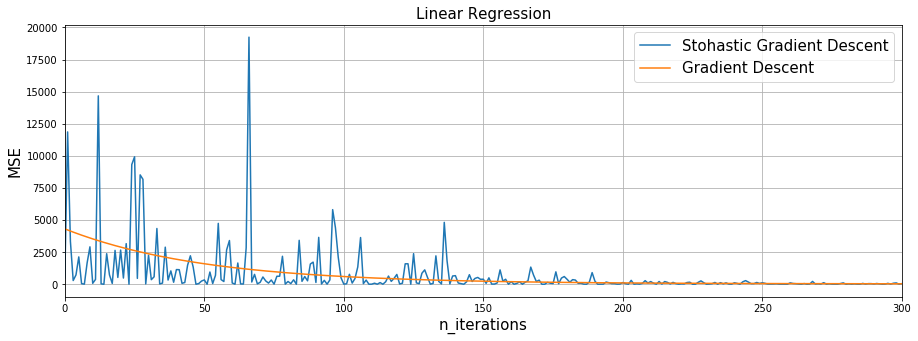

In [40]:
fig = plt.figure(figsize=(15, 5))
plt.title("Linear Regression", size=15)
plt.plot(sgd_all_errors, label="Stohastic Gradient Descent")
plt.plot(gd_all_errors, label="Gradient Descent")
plt.legend(loc="best", fontsize=15)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.xlim(0, 300)
plt.grid()

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [32]:
def eval_sgd_ridge_model(x, y, qty_in_batch = 1, alpha = 0.005, cf:float = 0.01, n_iters = 1000, tolerance = 1e-4):
    
    #рандомно зададим веса с нормальным распределением
    weights = np.random.randn(x.shape[1])
    
    all_errors = []
    all_weights = []
    
    n_batches = len(y) // qty_in_batch
    
    #если нацело не делится, то добавляем еще один: 
    if len(y) % qty_in_batch:
        n_batches += 1
        
    for i in range(n_iters):
        for batch_number in range(n_batches):
            start_ = qty_in_batch*batch_number
            end_ = qty_in_batch*(batch_number+1)
                
            # print(batch_number, qty_in_batch, start_, end_)
                
            x_tmp = x[start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(weights, x_tmp.T)
            err = mserror(y_tmp, y_pred_tmp)
            weights -= 2*alpha*(np.sum(x_tmp.T*(y_pred_tmp - y_tmp), axis=1)/len(y_pred_tmp) + 2*cf * weights)
            all_errors.append(err)
            all_weights.append(weights)

        if i > 2 and np.abs(err - all_errors[-2]) < tolerance:
            break
        
    return weights, all_weights, all_errors

In [33]:
sgd_ridge_weights, sgd_ridge_all_weights, sgd_ridge_all_errors = eval_sgd_ridge_model(x, y, qty_in_batch=1)

In [42]:
sgd_ridge_all_errors

[430.5050248653466,
 12710.020311276374,
 3184.331970202946,
 320.6723898119597,
 822.3223256084588,
 1991.2622823394927,
 35.98841609134655,
 11.294430674249814,
 1701.2293872666128,
 2943.72422722626,
 61.69326485304713,
 390.7410287365144,
 14280.657513315256,
 10.382024876482435,
 0.09842025042297053,
 2613.312403559484,
 679.2327369337183,
 95.17132139794272,
 2621.176873847204,
 568.7068360253145,
 2382.879150937559,
 504.7905577286812,
 3338.652293559543,
 0.5969193424712946,
 9406.726457064473,
 10458.20352119277,
 472.9139754856218,
 8908.932583897871,
 8297.713848802148,
 20.537758378323776,
 2355.403579316001,
 407.8022595496062,
 499.07227377382964,
 4378.825829515121,
 31.19127332748693,
 90.83969104574953,
 2712.6506237069807,
 369.96232269052354,
 1142.8789838918008,
 149.9396041488722,
 1283.1348424333612,
 1149.5222739022663,
 76.75839375208304,
 100.87773150641672,
 1455.3529854506282,
 2178.2748005888348,
 1277.7195507777913,
 0.8803802659052976,
 55.469781151974885,

In [46]:
gd_ridge_weights, gd_ridge_all_weights, gd_ridge_all_errors = eval_sgd_ridge_model(x, y, qty_in_batch=x.shape[0])

In [47]:
gd_ridge_all_errors

[4287.965533185992,
 4203.204643036225,
 4120.146042073185,
 4038.7553741343904,
 3958.9989781782483,
 3880.8438742020603,
 3804.2577494454945,
 3729.2089448737147,
 3655.6664419345234,
 3583.599849583939,
 3512.979391574777,
 3443.7758940028975,
 3375.960773105899,
 3309.5060233091276,
 3244.3842055140026,
 3180.568435623737,
 3118.0323733016335,
 3056.750210957252,
 2996.6966629558187,
 2937.8469550463565,
 2880.176814004099,
 2823.662457482839,
 2768.2805840729607,
 2714.0083635609885,
 2660.823427386551,
 2608.7038592927775,
 2557.6281861661832,
 2507.575369062228,
 2458.524794412753,
 2410.456265411632,
 2363.3499935750115,
 2317.186590472605,
 2271.94705962657,
 2227.612788574572,
 2184.165541093699,
 2141.587449581988,
 2099.8610075943316,
 2058.9690625296676,
 2018.8948084663684,
 1979.621779142825,
 1941.133841080292,
 1903.4151868450922,
 1866.450328447376,
 1830.2240908736471,
 1794.7216057503615,
 1759.9283051359212,
 1725.8299154384813,
 1692.412451457003,
 1659.6622105430

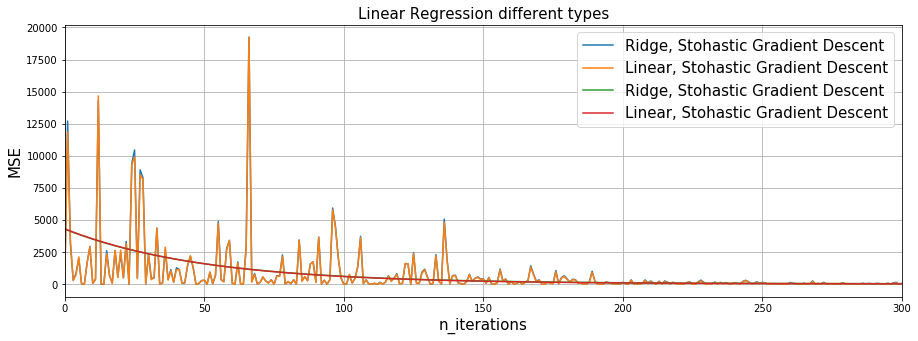

In [49]:
fig = plt.figure(figsize=(15, 5))
plt.title("Linear Regression different types", size=15)
plt.plot(sgd_ridge_all_errors, label="Ridge, Stohastic Gradient Descent")
plt.plot(sgd_all_errors, label="Linear, Stohastic Gradient Descent")
plt.plot(gd_ridge_all_errors, label="Ridge, Stohastic Gradient Descent")
plt.plot(gd_all_errors, label="Linear, Stohastic Gradient Descent")
plt.legend(loc="best", fontsize=15)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.xlim(0, 300)
plt.grid()